In [82]:
import copy
 
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


rand_seed = 921220

In [91]:
#load the calculated theoretical data from the csv file into a pandas dataframe
Theoretical_data = pd.read_csv('Theory_data.csv')

#load the target values of the parameters into a pandas dataframe
Target_Values = pd.read_csv('Target_Data.csv')

#look at the first few rows of the data
display(Theoretical_data.head())

#look at the Given Values
display(Target_Values.head())


,Radius (m),Aspect Ratio,Pressure Drop (Pa),Pressure Gradient(Pa m^-1),Apparent Wall Shear Rate (s^-1),Volumetric Flow Rate (m^3 s^-1)
0,0.00025,10.0,75000000.0,1.500000e+10,1.918200,2.353985e-11
1,0.00025,10.0,75000000.0,1.500000e+10,1.839200,2.257038e-11
2,0.00025,10.0,75000000.0,1.500000e+10,1.783435,2.188604e-11
3,0.00025,10.0,75000000.0,1.500000e+10,1.741969,2.137718e-11
4,0.00025,10.0,75000000.0,1.500000e+10,9.304931,1.141887e-10


,Slip Velocity Coefficient,Shear Thinning Index,Shear Thinning Consistency (Pa s^n),Slip Volumetric Flow Rate (m^3 s^-1),Plug Volumetric Flow Rate (m^3 s^-1)
0,5.000000e-11,0.5,800.000000,1.791690e-11,5.622959e-12
1,5.000000e-11,0.5,966.666667,1.791690e-11,4.653484e-12
2,5.000000e-11,0.5,1133.333333,1.791690e-11,3.969148e-12
3,5.000000e-11,0.5,1300.000000,1.791690e-11,3.460283e-12
4,5.000000e-11,0.6,800.000000,1.791690e-11,9.627178e-11


In [92]:
# Create a StandardScaler object
Xscaler = StandardScaler()
yscaler = StandardScaler()

#scale the data
Theoretical_data_scaled = Xscaler.fit_transform(Theoretical_data)
Target_Values_scaled = yscaler.fit_transform(Target_Values)

#split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(Theoretical_data_scaled, Target_Values_scaled, test_size=0.9, random_state=rand_seed)

#split the training data into training and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=rand_seed)


In [93]:
print(X_train.shape, "train samples", X_val.shape, "validation samples", X_test.shape, "test samples")
print(y_train.shape, "train samples", y_val.shape, "validation samples", y_test.shape, "test samples")  

(23040, 6) train samples (5760, 6) validation samples (259200, 6) test samples
(23040, 5) train samples (5760, 5) validation samples (259200, 5) test samples


In [103]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model architecture
model = keras.Sequential([
    layers.Dense(64, activation='gelu', input_shape=(6,)), # Input layer
    layers.Dense(64, activation='gelu'), # Hidden layer1
    layers.Dense(64, activation='gelu'), # Hidden layer2
    layers.Dense(5) # No activation function for the output layer (linear activation function
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), use_multiprocessing=True)

# Evaluate the model
loss = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

Epoch 1/50
720/720 [==============================] - 3s 4ms/step - loss: 0.5078 - val_loss: 0.4458
Epoch 2/50
720/720 [==============================] - 2s 3ms/step - loss: 0.4407 - val_loss: 0.4233
Epoch 3/50
720/720 [==============================] - 2s 3ms/step - loss: 0.4174 - val_loss: 0.3966
Epoch 4/50
720/720 [==============================] - 2s 3ms/step - loss: 0.3946 - val_loss: 0.3771
Epoch 5/50
720/720 [==============================] - 3s 3ms/step - loss: 0.3799 - val_loss: 0.3664
Epoch 6/50
720/720 [==============================] - 2s 3ms/step - loss: 0.3725 - val_loss: 0.3618
Epoch 7/50
720/720 [==============================] - 2s 3ms/step - loss: 0.3683 - val_loss: 0.3626
Epoch 8/50
720/720 [==============================] - 2s 3ms/step - loss: 0.3646 - val_loss: 0.3567
Epoch 9/50
720/720 [==============================] - 2s 3ms/step - loss: 0.3618 - val_loss: 0.3537
Epoch 10/50
720/720 [==============================] - 2s 3ms/step - loss: 0.3602 - val_loss: 0.3542

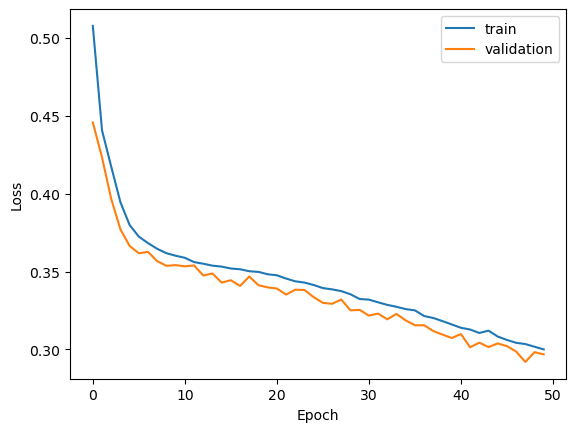

In [104]:
# Plot the loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
train_f1 = multiclass_f1_score(y_train_pred.argmax(dim=1), y_train,
                                   num_classes=10, average='macro')
    valid_f1 = multiclass_f1_score(y_valid_pred.argmax(dim=1), y_valid,
                                   num_classes=10, average='macro')